In [4]:
import numpy as np
from scipy.integrate import quad
from scipy.integrate import odeint 
import matplotlib.pyplot as plt

In [2]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

$\text{Exercise 1}$

Write a Python code to compute and display the integrals bellow using the Python function $quad$
$$A = \int_{0}^{2} \dfrac{x^3+5x-20}{x^2+3}dx$$

$$B = \int_{3}^{5} \bigg(x-\frac{1}{3}\bigg)\sqrt{x^4-3}dx$$


In [3]:
f=lambda x:(x**3+5*x-20)/(x**2+3)
print("A =",quad(f,0,2)[0])

g=lambda x:(x-1/3)*(x**4-3)**0.5
print("B =",quad(g,3,5)[0])

A = -7.049316535735796
B = 124.40877284192784


$\text{Exercise 2}$

1. Write code to solve the following system of ordinary differential equations
$$
\begin{cases}
\dfrac{dx_1}{dt}& = & -\dfrac{1}{2}x_1\\\\
\dfrac{dx_2}{dt}& = & \dfrac{1}{2}x_1-\dfrac{1}{4}x_2\\\\
\dfrac{dx_3}{dt}& = & \dfrac{1}{4}x_2-\dfrac{1}{6}x_3
\end{cases}, \text{ on } [0,4]
$$
Subject to the initial conditions $x_1(0) = 1, x_2(0) = 1, x_3(0) = 1$ using the Python function <b>odeint</b> with $N=200$.

In [4]:
def model(w,t):
    x1,x2,x3=w
    dx1dt=-1/2*x1
    dx2dt=1/2*x1-1/4*x2
    dx3dt=1/4*x2-1/6*x3
    return np.array([dx1dt,dx2dt,dx3dt])
w0=[1,1,1]
a=0
b=4
N=200

t=np.linspace(a,b,N)
w=odeint(model,w0,t)
x1=w[:,0]
x2=w[:,1]
x3=w[:,2]


2. The exact solution of the above system of ODEs is given by

$$
\begin{cases}
x_1(t)& = & e^{-t/2}\\
x_2(t)& = & -2e^{-t/2}+3e^{-t/4}\\
x_3(t)& = & \dfrac{3}{2}e^{-t/2} - 9e^{-t/4} + \dfrac{17}{2}e^{-t/6}
\end{cases}
$$

Use $Subplot$ to plot side by side

- each exact and approximate solution in the same window
- and their absolute error vs the time 


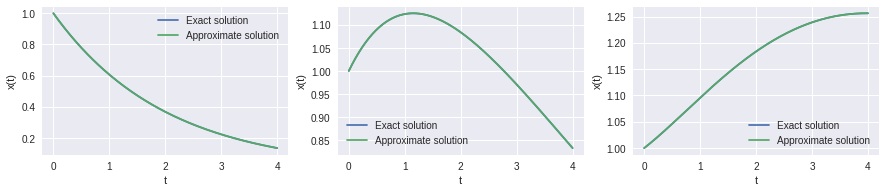

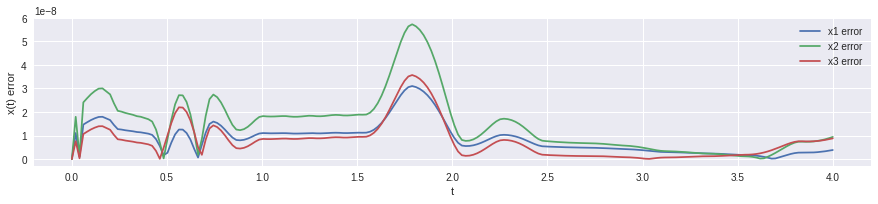

In [5]:
x1_ex=np.exp(-t/2)
x2_ex=-2*np.exp(-t/2)+3*np.exp(-t/4)
x3_ex=3/2*np.exp(-t/2)-9*np.exp(-t/4)+17/2*np.exp(-t/6)
er_1=np.absolute(x1-x1_ex)
er_2=np.absolute(x2-x2_ex)
er_3=np.absolute(x3-x3_ex)

plt.style.use('seaborn')
plt.figure(figsize=(15,6))
plt.subplot(2,3,1)
plt.plot(t,x1_ex)
plt.plot(t,x1)
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend(["Exact solution","Approximate solution"])



# plt.figure(figsize=(15,6))
plt.subplot(2,3,2)
plt.plot(t,x2_ex)
plt.plot(t,x2)
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend(["Exact solution","Approximate solution"])

# plt.figure(figsize=(15,6))
plt.subplot(2,3,3)
plt.plot(t,x3_ex)
plt.plot(t,x3)
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend(["Exact solution","Approximate solution"])

# fig = plt.figure()
plt.figure(figsize=(15,6))
plt.subplot(2,3,(4,6))
plt.plot(t,er_1)
plt.plot(t,er_2)
plt.plot(t,er_3)
plt.xlabel("t")
plt.ylabel("x(t) error")
plt.legend(["x1 error","x2 error","x3 error"])
plt.show()
# fig.savefig('image.png')


$\text{Exercise 3} $ (Write our own function and compare it with $odeint$)

Let $\{ t_k\}$ be a partition of $[a,b]$ such that $a=t_1<t_2<\cdots<t_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = t_k - t_{k-1}$). Let us consider initial value problem

\begin{equation}\label{eul2}
  \begin{cases}
    \dfrac{dz}{dt} = f(z,t),      & \quad \text{on } [a, b]\\\\
    z(a) = c,
  \end{cases}
\end{equation}
where $z,f,c\in R^M$ i.e. $z = [x_1, x_2,\cdots, x_{M}]$, $c = [x_1(a), x_2(a),\cdots, x_{M}(a)]$ and $f = [f_1, f_2,\cdots, f_{M}]$. Note that \eqref{eul2} is a the general form of system of ODEs. 

Let $t, z_k,Z$ defined as follows $$t=[t_1,t_2,\cdots,t_{N-1},t_{N}],\quad z_k = [x_1(t_k), x_2(t_k),\cdots, x_{M}(t_k)], \quad
Z =\begin{pmatrix}
x_1(t_1)& x_2(t_1)&\cdots& x_{M}(t_1)\\
x_1(t_2)& x_2(t_2)&\cdots& x_{M}(t_2)\\
\vdots& \vdots&\ddots& \vdots\\
x_1(t_{N})& x_2(t_{N})&\cdots& x_{M}(t_{N})
\end{pmatrix}
$$

1. Write a python function <b> EulerOdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem \eqref{eul2} using Euler method i.e.
$$ z_{k+1} = z_k + Hf(z_k,t_k) $$


In [6]:
def EulerOdeSys(f,c,t):
    N=len(t)
    H=t[1]-t[0]
    M=len(f)
    Z=np.zeros((N,M))
    Z[0,:]=c
    
    for j in range(M):
        g=f[j]
        for i in range(N-1):
            Z[i+1,j]= Z[i,j]+H*g(Z[i,j],t[i])       
    return Z


2. Write a python function <b> RK4OdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem (1) using the fourth order Runge-Kutta method i.e.

\begin{equation}
\begin{cases}
k_1 = f(z_k,t_k),\\\\
k_2 = f(z_k+H\dfrac{k_1}{2}, t_k + \dfrac{H}{2}),\\\\
k_3 = f(z_k+H\dfrac{k_2}{2}, t_k + \dfrac{H}{2}),\\\\
k_4 = f(z_k+Hk_3, t_k + H),\\\\
z_{k+1} = z_k + \dfrac{H}{6}(k_1+2k_2+2k_3+k_4)
\end{cases}
\end{equation}



In [7]:
def RK4OdeSys(f,c,t):
    N=len(t)
    H=t[1]-t[0]
    M=len(f)
    Z=np.zeros((N,M))
    Z[0,:]=c
    for j in range(M):
        g=f[j]
        for i in range(N-1):
            k1=g(Z[i,j],t[i])
            k2=g(Z[i,j]+H*k1/2,t[i]+H/2)
            k3=g(Z[i,j]+H*k2/2,t[i]+H/2)
            k4=g(Z[i,j]+H*k3,t[i]+H)
            Z[i+1,j]= Z[i,j]+H/6*(k1+2*k2+2*k3+k4) 
    return Z

3. Solve the system of ODEs in $Exercise2$ using your function <b> EulerOdeSys </b> and <b> RK4OdeSys </b> 

In [8]:
x_1=lambda x,y:-1/2*x
x_2=lambda x,y:1/2*x-1/4*x
x_3=lambda x,y:1/4*x-1/6*x

f=[x_1,x_2,x_3]
c=1       
Z_Euler=EulerOdeSys(f,c,t)
Z_RK=RK4OdeSys(f,c,t)

4. By plotting the absolute error in the approximate and exact solutions, tell us which function gives a more accurate solution of a system of ODEs.

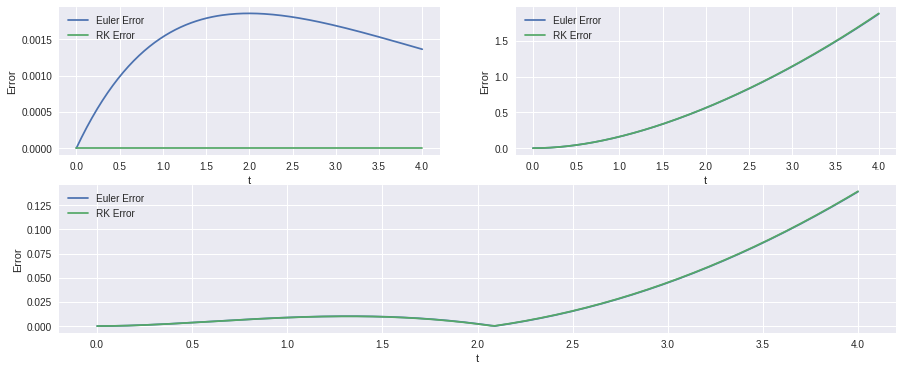

In [9]:
er_1_E=np.absolute(Z_Euler[:,0]-x1_ex)
er_2_E=np.absolute(Z_Euler[:,1]-x2_ex)
er_3_E=np.absolute(Z_Euler[:,2]-x3_ex)

er_1_RK=np.absolute(Z_RK[:,0]-x1_ex)
er_2_RK=np.absolute(Z_RK[:,1]-x2_ex)
er_3_RK=np.absolute(Z_RK[:,2]-x3_ex)


plt.style.use('seaborn')
plt.figure(figsize=(15,6))
plt.subplot(2,2,1)
plt.plot(t,er_1_E)
plt.plot(t,er_1_RK)
plt.xlabel("t")
plt.ylabel("Error")
plt.legend(["Euler Error","RK Error"])


plt.subplot(2,2,2)
plt.plot(t,er_2_E)
plt.plot(t,er_2_RK)
plt.xlabel("t")
plt.ylabel("Error")
plt.legend(["Euler Error","RK Error"])



plt.subplot(2,2,(3,4))
plt.plot(t,er_3_E)
plt.plot(t,er_3_RK)
plt.xlabel("t")
plt.ylabel("Error")
plt.legend(["Euler Error","RK Error"])
plt.show()

From the plot above we can only conclude that the more accurate function is either <b>odeint</b> and <b>RK4</b> since they give a solution with the lowest error. To identify the more accurate solver, let us plot the absolute error between the exact and approximate solutions (obtained with <b>odeint</b> and <b>RK4</b>), tell us which function gives a more accurate solution of a system of ODEs.

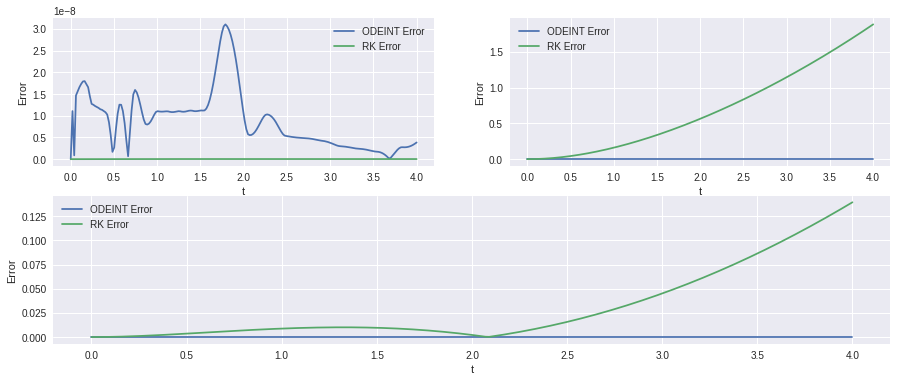

In [10]:
er_1=np.absolute(x1-x1_ex)
er_2=np.absolute(x2-x2_ex)
er_3=np.absolute(x3-x3_ex)

er_1_RK=np.absolute(Z_RK[:,0]-x1_ex)
er_2_RK=np.absolute(Z_RK[:,1]-x2_ex)
er_3_RK=np.absolute(Z_RK[:,2]-x3_ex)

plt.style.use('seaborn')
plt.figure(figsize=(15,6))
plt.subplot(2,2,1)
plt.plot(t,er_1)
plt.plot(t,er_1_RK)
plt.xlabel("t")
plt.ylabel("Error")
plt.legend(["ODEINT Error","RK Error"])



plt.subplot(2,2,2)
plt.plot(t,er_2)
plt.plot(t,er_2_RK)
plt.xlabel("t")
plt.ylabel("Error")
plt.legend(["ODEINT Error","RK Error"])



plt.subplot(2,2,(3,4))
plt.plot(t,er_3)
plt.plot(t,er_3_RK)
plt.xlabel("t")
plt.ylabel("Error")
plt.legend(["ODEINT Error","RK Error"])
plt.show()

$\text{Exercise 4} $

Consider heat conduction in a rod with constant heat conduction properties, $K>0$. The steady-state
heat-conduction problem is then

\begin{equation}
  \begin{cases}
    -K\dfrac{d^2U}{dx^2} = g(x),      & \quad x\in (a, b)\\\\
    U(a) = \alpha,\;\; U(b) = \beta.
  \end{cases}
\end{equation}

Given a finite family of points $\{x_i\}$ for $i = 0,\cdots, N$ defined by $x_i = a+ih$ with $h =\dfrac{b−a}{N}$. Let us denote $U_i$ the approximate value of $U(x_i)$ for all $i= 0,\cdots, N$.

The backward Euler scheme applied to the steady-state
heat-conduction problem gives

\begin{equation}\label{secode}
  \begin{cases}
    \dfrac{K}{H^2}(-U_{i-1} +2U_i - U_{i+1}) = g(x_i),      & \quad \forall i= 1,2,\cdots, N-1\\\\
    U_0 = \alpha,\;\; U_N = \beta.
  \end{cases}
\end{equation}
Note that the system \eqref{secode} takes the form 
$$ AU = b $$.
1. Write a Python function <b> MatGenerator </b> that takes $a,b,K, \alpha, \beta,N, g$ and return the matrix $A$ and vector $b$.

In [11]:
def MatGenerator(𝑎,𝑏,𝐾,alp,bta,𝑁,𝑔):
    h=(b-a)/N
    x=np.linspace(a,b,N+1)
    A=np.zeros((N+1,N+1))
    A[0,0],A[N,N]=1,1
    A[1,0],A[N-1,N]=-1,-1
    A[1:N,1:N]=2*np.eye(N-1,N-1,k=0)-np.eye(N-1,N-1,k=1)-np.eye(N-1,N-1,k=-1)
    b=np.zeros(N+1)
    b[0]=alp
    b[N]=bta
    b[1:N]=h**2/K*g(x[1:N])
    return A,b
    
    
    
    
    

2. Solve the steady-state heat-conduction problem for 

$$a=0, b= 1, K=1,\alpha = -4, \beta = 0, N= 100 \text{ and } g(x) = -4(1+x)e^x $$

In [12]:
𝑎=0
𝑏=1
𝐾=1
alp=-4
bta=0
𝑁=100
𝑔=lambda x:-4*(1+𝑥)*np.exp(x)
M=MatGenerator(𝑎,𝑏,𝐾,alp,bta,𝑁,𝑔)

3. The exact solution of the steady-state heat-conduction problem above is $U(x)=4(x-1)e^x$. Use Subplot to plot side by side
    - the exact and approximate solutions against x
    - the absolute error between the exact and the approximate solution against x

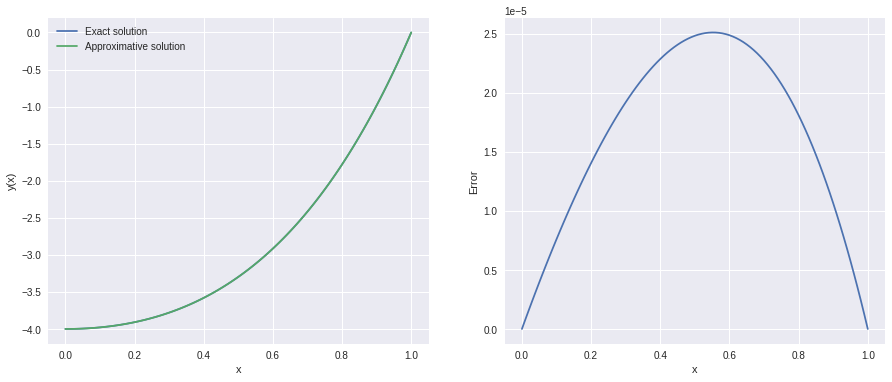

In [13]:
𝑈=lambda x:4*(𝑥-1)*np.exp(x)
x=np.linspace(a,b,N+1)
U_ex=U(x)

A=M[0]
b=M[1]
Approx=np.linalg.solve(A,b)

plt.style.use('seaborn')
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(x,U_ex)
plt.plot(x,Approx)
plt.xlabel("x")
plt.ylabel("y(x)")
plt.legend(["Exact solution","Approximative solution"])



plt.subplot(1,2,2)
plt.plot(x,abs(Approx-U_ex))
plt.xlabel("x")
plt.ylabel("Error")
plt.show()



4. If the parameter $K(x)$ varies with $x$, then the steady-state
heat-conduction problem is then

\begin{equation}
  \begin{cases}
    -\dfrac{d}{dx}\Bigl( K(x)\dfrac{dU}{dx} \Bigl) = g(x),      & \quad x\in (a, b)\\\\
    U(a) = \alpha,\;\; U(b) = \beta.
  \end{cases}
\end{equation}


In this case, the backward Euler scheme applied to the steady-state
heat-conduction problem gives

\begin{equation}\label{secode}
  \begin{cases}
    \dfrac{1}{H^2}\Bigl(-K(x_{i-1/2})U_{i-1} +(K(x_{i-1/2})+K(x_{i+1/2}))U_i - K(x_{i+1/2})U_{i+1}\Bigr) = g(x_i),      & \quad \forall i= 1,2,\cdots, N-1\\\\
    U_0 = \alpha,\;\; U_N = \beta,
  \end{cases}
\end{equation}
where $x_{i+1/2} = x_i+H/2$.
Note that the system \eqref{secode} takes the form 
$$ AU = b $$.
a. Write a Python function <b> MatGenerator1 </b> that takes $a,b,K, \alpha, \beta,N, g$ and return the matrix $A$ and vector $b$.

In [1]:
def  MatGenerator1(a,b,K, alpha, beta,N, g):
    H=(b-a)/N
    global x,xe
    x=np.linspace(a,b,N+1)
    xe=x+H/2
    B=np.zeros(N+1)
    B[0]=alpha
    B[N]=beta
    B[1:N]=(H**2)*g(x[1:N])
    A=np.eye(N+1,N+1)
    A[1,0]=-K(xe[0])
    A[N-1,N]=-K(xe[N])
    T=np.zeros((N-1,N-1))
    for i in range(N-1):
        T[i]=-K(xe[i])*np.eye(N-1,N-1,k=-1)[i]+(K(xe[i])+K(xe[i+1]))*np.eye(N-1,N-1,k=0)[i]-K(xe[i+1])*np.eye(N-1,N-1,k=1)[i]
    A[1:N,1:N]=T
    return A,B

b. Solve the steady-state heat-conduction problem for 

$$a=-1, b= 1, K(x)=x^2,\alpha = -8, \beta = 0, N= 100 \text{ and } g(x) = -4(x^3+3x^2)e^{x+1} $$

[ -8.          -8.07999431  -8.15995574  -8.2398503   -8.31964265
  -8.39929605  -8.47877232  -8.55803177  -8.63703321  -8.71573385
  -8.79408928  -8.87205342  -8.94957847  -9.02661486  -9.10311118
  -9.17901414  -9.25426855  -9.32881718  -9.40260077  -9.47555797
  -9.54762523  -9.61873677  -9.68882452  -9.75781804  -9.82564445
  -9.89222836  -9.95749181 -10.02135418 -10.08373211 -10.14453942
 -10.20368704 -10.26108292 -10.31663192 -10.37023573 -10.42179277
 -10.47119807 -10.51834315 -10.56311594 -10.60540054 -10.64507715
 -10.68202178 -10.71610602 -10.74719667 -10.77515511 -10.79983641
 -10.82108751 -10.8387434  -10.85261746 -10.86246993 -10.86784856
 -10.86543972 -10.86303088 -10.85680764 -10.84576003 -10.82974105
 -10.80858477 -10.7821077  -10.75011427 -10.71239947 -10.66875007
 -10.61894522 -10.56275667 -10.49994886 -10.43027887 -10.35349639
 -10.26934352 -10.17755469 -10.07785648  -9.9699674   -9.85359775
  -9.72844938  -9.59421551  -9.45058051  -9.29721963  -9.13379883
  -8.95997

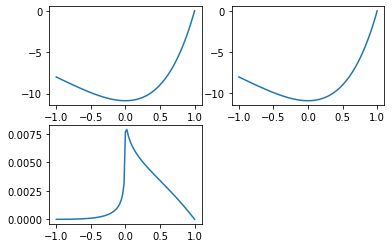

In [5]:
k=lambda x: x**2
g=lambda x: -4*(x**3+3*x**2)*np.exp(x+1)
uex=lambda x: 4*(x-1)*np.exp(x+1)
#print(U)
A,B=MatGenerator1(-1,1,k, -8, 0,100, g)
U=np.linalg.solve(A,B)
print(U)
plt.subplot(2,2,1)
plt.plot(x,U)
plt.subplot(2,2,2)
plt.plot(x,uex(x))
plt.subplot(2,2,3)
plt.plot(x,abs(U-uex(x)))

In [6]:
c. The exact solution of the steady-state heat-conduction problem above is $U(x)=4(x-1)e^{x+1}$. Use Subplot to plot side by side
    - the exact and approximate solutions against x
    - the absolute error between the exact and the approximate solution against x

SyntaxError: invalid syntax (<ipython-input-6-ec0f5ec5e297>, line 1)

# assignment 2

#1

1- Each new term in the Fibonacci sequence is generated by adding the previous two terms. By starting with 1 and 2, the first 10 terms will be:

1, 2, 3, 5, 8, 13, 21, 34, 55, 89, ...

By considering the terms in the Fibonacci sequence whose values do not exceed four million, find the sum of the even-valued terms.




In [14]:
def fibonacci():
    f1=1
    f2=2
    fn=2
    s=2
    while fn<=4000000:
        fn=f1+f2
        if fn%2:
            s+=fn
        f1=f2
        f2=fn
    return s
print("the sum of even valued terms= ",fibonacci())        

the sum of even valued terms=  10316619


2- An irrational decimal fraction is created by concatenating the positive integers: 0.12345678910<font color='red'>1</font>112131415161718192021...

It can be seen that the 12th digit of the fractional part is <font color='red'>1</font>. If $d_n$ represents the nth digit of the fractional part, find the value of the following expression.

$$d_1 × d_{10} × d_{100} × d_{1000} × d_{10000} × d_{100000} × d_{1000000}$$

In [15]:
s=""
i=1
while len(s)<1000000:
    s+=str(i)
    i+=1
#print(s)
dpro=1
for i in range(7):
    dpro*=int(s[(10**i)-1])
print("the product of digits",dpro)

the product of digits 210


3- You are given the following information, but you may prefer to do some research for yourself.

- 1 Jan 1900 was a Monday.
- Thirty days has September, April, June and November.
- All the rest have thirty-one, Saving February alone, Which has twenty-eight, rain or shine. And on leap years, twenty-nine.
- A leap year occurs on any year evenly divisible by 4, but not on a century unless it is divisible by 400.

How many Sundays fell on the first of the month during the twentieth century (1 Jan 1901 to 31 Dec 2000)?

In [16]:
year=1900
date=1
day=1
month=1
sundays=0
month_and_days={1:31,
                2:29 if (year % 4 == 0 and year % 100 != 0 or year % 400 == 0) else 28,
                3:31,4:30,5:31,6:30,7:31,8:31,9:30,10:31,11:30,12:31}
while year<=2000:
    if day==7 and date==1 and year>1900:
        sundays+=1
    if day==7:
        day=1
    else:
        day+=1
        
    if date==month_and_days[month]:
        if month==12:
            date=1
            month=1
            year+=1
        else:
            date=1
            month+=1
    else:
        date+=1           
print("the sundays which fell on first of a month during the twentieth century are ",sundays)              

the sundays which fell on first of a month during the twentieth century are  171


**Exercise 2**

1- Write a function that takes one argument: A string ``s`` and returns another string ``t``. The string ``t`` should be constructed from ``s`` such that:
* All **upper** case letters from ``s`` are changed into **lower** case.
* All **lower** case letters from ``s`` are changed into **upper** case.
* All characters from ``s`` that are not letters are **deleted**.

In [17]:
def st(s):
    t=""
    for i in s:
        if i.isupper():
            t+=i.lower()
        if i.islower():
            t+=i.upper()
    return t
        

2- Write a function, named **UpLow**, that takes one argument: string ``s`` and **returns** a list with two elements. The first element should be the number of **lowercase letters** in ``s``. The second element should be the number of **uppercase letters** in ``s``.

In [7]:
def UpLow(s):
    up=0
    low=0
    L=[]
    for i in s:
        if i.islower():
            low=low+1
        if i.isupper():
            up=up+1
    L.append(low)
    L.append(up)
    return L

s=input("Enter a string: ")
UpLow(s)


Enter a string: kgty


[4, 0]

3- Write a function that takes one argument: string ``s`` and returns either ``True`` or ``False``. It should return ``True`` if and only if **the string is a name**. We assume that a string is a name if:
* It starts with an uppercase letter.
* All the other characters are lowercase letters.

In [ ]:
def Name(s):
    if s[0].isupper():
        if s[1:].lower()==s[1:]:
            return True
    return False 
s=input("Enter a string: ")
Name(s)

4- Write a function that takes one argument: list of strings ``L``. The function should return an integer: **The first index where the list contains a name**. If there are no names on the list please return ``-1``

In [ ]:
def HasName(L):
    for i in range(len(L)):
        if Name(L[i]):
            return i
    return -1
HasName(["betty","patrick","Nadine","samson"])

**Exercise 3**

1- Write a function that takes one argument: List of integers ``L`` and returns the **maximum element in ``L`` which is strictly negative**. If such an element does not exist, **return ``0``**.

In [ ]:
def MaxNeg(L):
    S=[]
    for i in L:
        if i < 0:
            S.append(i)
    if len(S)==0:
        return 0
    return max(S)
MaxNeg([2,-2,-5,5,7])
           

2- Write a function that takes one argument: A 2D array ``M`` and:
* For each **row** computes the maximum negative element.
* Returns the **sum of those elements**.

Please use the function from Problem 3 in your solution.

In [ ]:
def MaxNegRow(M):
    s=0
    for i in  M:
        t=MaxNeg(i)
        s=s+t
    return s
MaxNegRow([[1,2],[-2,-7]])

3- Write a function that takes one argument: A matrix of integers ``M`` and:
* For each **column** computes the maximum negative element.
* Returns the **sum of those elements**.


In [ ]:
def MaxNegCol(M):
    import numpy as np
    s=0
    P=np.array(M).T
    for i in P:
        t=MaxNeg(i)
        s+=t
    return s
MaxNegCol([[1,2],[-2,-7]])

2- Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<x_1<\cdots<x_{N-1}<x_N=b$ and $H$ be the length of the $k$-th subinterval ($H = x_k - x_{k-1}$),
then we have 
$$\int_a^bf(x)dx \approx \sum_{k=1}^N \frac{f(x_{k-1})+f(x_k)}{2}H = Z$$


Write a function named <b>Trap</b> that takes $a,b,H, f$ as inputs and return Z. Here, ``H = 0.001`` is the default value.

In [ ]:
def Trap(a,b,f,H=0.001):
    import numpy as np
    x=np.arange(a,b+H,H)
    Z=0
    for k in range(1,len(x)):
        Z+=((f(x[k-1])+f(x[k]))/2)*H
    return Z
        
        

3- Compute the integrales A and B using your function **Trap**

In [ ]:
print("A= ",Trap(0,2,lambda x: (x**3+5*x-20)/(x**2+3),H=0.001))
print("B= ",Trap(3,5,lambda x:(x-1/3)*np.sqrt(x**4-3),H=0.001))

**Exercise 5**
Write a python code to solve the following system of equations
1. \begin{equation}
\begin{cases}
    x^2 + y + x = 4\\
    2e^x + 3y = 14
\end{cases}
\end{equation}

In [ ]:
from scipy.optimize import fsolve 
import numpy as np
def f1 (z):
    x=z[0]
    y=z[1]
    F=np.empty((2))
    F[0]= x**2+y+x-4
    F[1]= 2*np.exp(x)+3*y-14
    return F
t=np.array([1,2])
print("x= ",fsolve(f1,t)[0],"y= ",fsolve(f1,t)[1])
    

**Exercise 6**

Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<x_1<\cdots<x_{N-1}<x_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = x_k - x_{k-1}$). Let us consider initial value problem

\begin{equation}\label{eul2}
  \begin{cases}
    y' = f(x,y),      & \quad \text{on } [a, b]\\&\qquad\qquad\qquad (1)\\
    y(a) = c,
  \end{cases}
\end{equation}
Let $\{ y_k\}$ be the approximate solution i.e.  $y_k\approx g(x_k)=g_k$ where $g$ is the exact solution.
1. Write a python function <b> EulerMethod </b> that takes $a,b,c,N,$ and $f$ and return array of all $x_k$ and $y_k$ of (1) using Euler method i.e.
$$ y_{k+1} = y_k + Hf(x_k,y_k) $$


In [ ]:
def EulerMethod(a,b,c,N,f):
    x=np.linspace(a,b,N+1)
    H=(b-a)/N
    y=[c]
    for k in range(len(x)-1):
        y.append(y[k]+H*f(x[k],y[k]))
    y=np.array(y)
    return x,y

2. Write a python function <b> RK2Method </b> that takes $a,b,c,N,$ and $f$ and return array of all $x_k$ and $y_k$ of (1) using second order Runge-Kutta  method i.e.
\begin{equation}
\begin{cases}
\alpha = f(x_k,y_k)\\\\
y_{k+1} = y_k + Hf(x_k+\dfrac{H}{2}, y_k + \dfrac{H}{2}\alpha)
\end{cases}
\end{equation}

In [ ]:
def RK2Method(a,b,c,N,f):
    x=np.linspace(a,b,N+1)
    H=(b-a)/N
    y=[c]
    for k in range(len(x)-1):
        yk1=y[k]+H*f(x[k]+(H/2),y[k]+(H/2)*f(x[k],y[k]))
        y.append(yk1)
    y=np.array(y)
    return x,y
    

3. Let us consider the initial value problem 

\begin{equation}
  \begin{cases}
    y' = 2y + e^{2x},      & \quad \text{on } [0, 1]\\\\
    y(0) = 3,
  \end{cases}
\end{equation}
with exact solution $g(x) = (x+3)e^{2x}$. 

For $N=200$, use subplot to plot side by side
- the exact solution and the approximate solutions obtained with **odeint**, <b> EulerMethod </b> and <b> RK2Method </b>
- the absolute error between the exact solution and the approximate solutions obtained with **odeint**, <b> EulerMethod </b> and <b> RK2Method </b>

In [ ]:
import numpy as np
from scipy.integrate import odeint 
import matplotlib.pyplot as plt
#f=lambda y,t: 2*y+np.exp(2*x)
def model(y,x):
    dydt=2*y+np.exp(2*x)
    return dydt
c=3
a=0
b=1
N=200
x=np.linspace(a,b,N+1)
y1=odeint(model,c,x)
g=lambda x: (x+3)*np.exp(2*x)

plt.subplot(1,4,1)
plt.plot(x,y1)
plt.title("$odeint$")
plt.xlabel("x_axis")
plt.ylabel("y_axis")


y2=EulerMethod(a,b,c,N,model)[1]

plt.subplot(1,4,2)
plt.plot(x,y2)
plt.title("$Euler Method$")
plt.xlabel("x_axis")
plt.ylabel("y_axis")

y3=RK2Method(a,10,c,N,model)[1]

plt.subplot(1,4,3)
plt.plot(x,y2)
plt.title("$Rungekutta$")
plt.xlabel("x_axis")
plt.ylabel("y_axis")


plt.subplot(1,4,4)
plt.plot(x,g(x))
plt.title("$the exact solution$")
plt.xlabel("x_axis")
plt.ylabel("y_axis")


plt.show()

# filter

In [ ]:
# Write Python function called Process that takes α, N, q and return the array of x_i
def Process(alpha, N, q):
    x=np.zeros(N+1)
    x[0]=np.random.normal(0,1)
    x[1:]=alpha*x[0:N]+np.random.normal(0,q,N)
    return x #x

In [ ]:
def Data(x,r,h):
    N=len(x)-1
    y=np.zeros(N)
    y=h*x[1:]+np.random.normal(0,r,N)
    return y

In [ ]:
r = 0.1 
h = 1
alpha = 0.8
N = 30
q = 0.4
x=Process(alpha, N, q)
y=Data(x,r,h)

In [ ]:
plt.plot(np.arange(N+1),x)
plt.plot(np.arange(1,N+1),y)

plt.show()

In [ ]:
mu1_0 = 0
sigma1_0 = q+alpha**2
K1=h*(q+alpha**2)*(h**2*(q+alpha**2)+r)**(-1)
mu1_1=K1*y[0]
sigma1_1=(1-K1*h)*sigma1_0 

mu_old=np.zeros(N)
sigma_old=np.zeros(N)
K=np.zeros(N)
mu_new=np.zeros(N)
sigma_new=np.zeros(N)

mu_old[0]=mu1_0 
sigma_old[0]=sigma1_0
K[0]=K1
mu_new[0]=mu1_1
sigma_new[0]=sigma1_1

mu_old[1:]=alpha*mu_old[0:N-1]
sigma_old[1:]=q+alpha**2*sigma_new[0:N-1]
K[1:]=h*sigma_old[1:]*(h**2*sigma_old[1:]+r)**(-1)
mu_new[1:]=mu_old[1:]+ K[1:]*(y[1:]-h*mu_old[1:])
sigma_new[1:]=(1-h*K[1:])*sigma_old[1:]

In [ ]:
print(mu_new)
sigma_old

In [ ]:
print(mu_old)
sigma_new

In [ ]:
plt.plot(np.arange(1,N+1),x[1:],label="x")
plt.plot(np.arange(1,N+1),y,label="y")
plt.plot(np.arange(1,N+1),mu_old,label="mu_old")
plt.plot(np.arange(1,N+1),mu_new,label="mu_new")
plt.legend()
plt.show()

# pandas

Load the titanic dataset from the seaborn package

In [ ]:
import numpy as np
import seaborn as sb
datas = sb.load_dataset("titanic")
datas.shape
datas.head(10)
datas.isnull().sum()
datas.drop(columns = ['deck'], inplace = True)
datas.dropna(axis = 0, inplace = True)
datas.shape
datas.head(10)

Count the number of survived females

In [ ]:
datas.loc[(datas['sex'] == 'female') & (datas['survived'] == 1)].shape[0]

. Compute the average age of males who did not survived?

In [ ]:
datas.loc[(datas['sex'] == 'male') & (datas['survived'] == 0)].mean()[2]

. Reproduce the following three figures

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10), dpi=80)
plt.subplot(2,2,1)
sb.boxplot(x="sex", y="age", hue="who", data=datas)

plt.subplot(2,2,2)
sb.scatterplot(x="age", y="fare", data=datas)

plt.subplot(2,2,3)
sb.barplot(x="pclass", y="age", hue="alone", data=datas)

plt.show()

Clean the dataset by removing every record that contains a missing value?

In [ ]:
import numpy as np
import seaborn as sb
datas = sb.load_dataset("titanic")
datas.shape
datas.head(10)
datas.isnull().sum()
datas.drop(columns = ['deck'], inplace = True)
datas.dropna(axis = 0, inplace = True)
datas.shape
datas.head(10)

In [ ]:
datas.count

In [ ]:
#4.
datas.columns.size
#data1.count.size

# answer all question

Answer all the questions 
1. import matlplot, pandas and seaborn packages 
2. set context of seaborn theme to poster 
3. load the diamonds dataset from seaborn package 
4. how many columns in this dataset? 
5. list the names of all columns and describe the datatype of each column? 6. list the unique number of diamond colors in this dataset? 
7. what is the minimum depth of diamond? 
8. count the diamonds by their clarity and cut? 
9. list the color, clarity, and prices of the most expensive diamond? 
10. produce the following figures? 
11. build a regression model using carat, depth, x, y, and z columns as explana tory variables and price column as response variable, and report its accuracy using mean squared error metric? 


In [ ]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
sb.set_context('poster')
set1  = sb.load_dataset('diamonds')
set1.head()

In [ ]:
set1.shape[1]
set1.info()

In [ ]:
set1['color'].unique()

In [ ]:
set1['depth'].min()

In [ ]:
set1.groupby(by = ['clarity', 'cut']).count().iloc[:,0]

In [ ]:
set1.loc[set1['price'] == set1['price'].max()].iloc[:,[2,3,6]]

In [ ]:
plt.figure(figsize=(12, 10), dpi=80)
plt.subplot(1,2,1)
sb.violinplot(x='cut',y='price',data=set1)
plt.subplot(1,2,2)
sb.scatterplot(x='x',y='price',hue='cut',data=set1)

# data vesualisation about statistic isues

In [ ]:
#I.1pandas series
mydata=pd.Series(data=[1,2,3,4,5,6,7],index=["jeannette","ancille","leonce","aime","omojalabi","fridaus","mama"])
mydata

In [ ]:
#2. DataFrame
mydata2={'ages':pd.Series(data=[23,20,23,24,25],index=["leonce","ancille","jeannette","aime","anitha"]),'HEIGHT':pd.Series(data=[2.3,2.1,2.4,1.6,3],index=["leonce","ancille","jeannette","aime","anitha"])}
mydata2=pd.DataFrame(mydata2)
mydata2

In [ ]:
mydata.index
mydata2.columns

In [ ]:
d=pd.DataFrame(mydata2,index=["leonce","ancille","jeannette","aime","anitha"],columns=('age','HEIGHT'))
d

In [ ]:
#reading and writting data
mydata2=pd.read_json("https://data.smcgov.org/resource/mb6a-xn89.json")#JavaScript Object Notation
mydata2.head()

In [ ]:
mydata2=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data")
mydata2.head()

In [ ]:
#Data writting
#creating data frame
mydata2={'age':pd.Series(data=[20,21,22,23,24,25],index=["leonce","ancille","anitha","jeannette","flexi","aime"]),
        
        'height':pd.Series(data=[2.2,2.1,2.3,2.4,2.5,2.6],index=["leonce","ancille","anitha","jeannette","flexi","aime"])}
mydata2=pd.DataFrame(mydata2)
mydata2

In [ ]:
mydata2.head()

In [ ]:
# creating folder in the current directory and save data frame inside



In [ ]:
#basic statistics
mydata2.describe()# find the summary for data frame
mydata2.loc['leonce',:].describe()#to extract the index an#basic statistics
mydata2.describe()# find the summary for data frame
mydata2.loc['leonce',:].describe()#to extract the index and find the summary for index

In [ ]:
mydata2.corr()
mydata2.max()
mydata2.min()
mydata2.cov()
mydata2.std()
mydata2

In [ ]:
#data viewing
dic={'col1':[1,-2,3,1,5,6,1,-3,1,1],'col2':[4,-3,7,8,9,5,6,4,-2,-2],'col3':['euler','A','A','EULER','A','A','RK4','A','EULER','RK4']},
df=pd.DataFrame(dic, index=['a','b','c','d','e','f','g','h','i','j']) 

df

                                                                            

In [ ]:
#4.1.characteristics
df.index
df.values
df.dtypes
df.shape

In [ ]:

#4.2.accessing,slicing,and updating the values of data frame
#4.4.1 selecting pandas data using iloc
data = pd.read_csv('https://s3-eu-west-1.amazonaws.com/shanebucket/downloads/uk-500.csv')

data=pd.read_csv("https://s3-eu-west-1.amazonaws.com/shanebucket/downloads/uk-500.csv")
data

In [ ]:
np.random.seed(21)
data['id']=[np.random.randint(0,1000) for x in range(data.shape[0])]
data['id']
data.head(5)

In [ ]:
#single selection of raw
data.iloc[:,0]
data.iloc[:,1]
data.iloc[:,-1]
data.iloc[0]
data.iloc[1]
data.iloc[-1]


In [ ]:
#using loc in selection
data = pd.read_csv('https://s3-eu-west-1.amazonaws.com/shanebucket/downloads/uk-500.csv')
data
data['id']=[np.random.randint(0,1000) for x in range(data.shape[0])]
data.set_index('last_name',inplace=True)# deplacement of data
data.head()


In [ ]:
data.loc['Veness']

In [ ]:
data.loc[['Andrade','Veness','Zigomalas']]

In [ ]:
data.loc[['Andrade','Veness','Zigomalas'],['first_name','address','city']]

In [ ]:
data.loc['Andrade':'Veness',['first_name','address','city']]

In [ ]:
np.random.seed(21)
data['id'] = [np.random.randint(0,1000) for x in range(data.shape[0])]
data.set_index('id',inplace=True)# change the index to be id
data.head()

In [ ]:
i=data.index[0]
i=data.index[1]
print(i)

In [ ]:
data["county"]


# linear regression

In [ ]:
# Handle all my imports
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
#import statsmodels.api as sm
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

In [ ]:
data = {'Hours_Studied': [2,3,4,5,6,7,8,9,10],
       'Test_Grade':[57,66,73,76,79,81,90,96,100]}
df = pd.DataFrame(data)
df.head()###### collect data

In [ ]:
df.corr()#############to find collection

In [ ]:
# Simple scatter plot
df.plot(kind='scatter', x='Hours_Studied', y='Test_Grade', title='Grade vs Hours Studied')
plt.show()

linear regression model

## 2. Linear Regression Model

For a given positive interger $n$, Linear Regression assumes the following model: 
 
 $$Y = X\alpha+ \beta  + \epsilon,$$
where
- $X = [X_1, \cdots, X_n], X_i \in R^m$ is the list of independant variables (explanatory),
- $Y\in R^m$ is the dependant variable (Target) 
- $\alpha^T = [\alpha_1, \cdots, \alpha_n]$ is list of coefficients called slope, 
- $\beta\in R^m$ in called the intercept, 
- $\epsilon \in R^m$ is the error that cannot be explained by model.

 
Let's use the linear regression function from the <b>scikit-learn</b> library to find the values of $\alpha$ and $\beta$.

Let us denote $\hat{Y}$ the mean value of  $Y$ i.e.$$\hat{Y} = \dfrac{1}{n}\sum_{1}^n y_i $$

## 2.1. How good is your model?
There are three metrics widely used for evaluating linear model performance.
### 2.1.1. R-Squared for goodness of fit

The R-squared metric is the most popular practice of evaluating how well your model fits
the data. 
$$ \text{R-squared} = 1 - \dfrac{\sum_{1}^n(e_i)^2}{\sum_{1}^n(Y_i -\bar{Y})^2} $$
It is a value between 0 and 1; the value
toward 1 indicates a better model fit. It can be computed with <b>r2_score</b> python function.

### 2.1.2. Mean Absolute Error (MAE)

The Mean Absolute Error, denoted MAE, is the mean or average of absolute value of the errors.
$$\text{MAE}= \dfrac{1}{n}\sum_{1}^n \mid e_i\mid $$

MAE indicates how close the
predicted values are to the actual values; hence a lower MAE value signifies that the
model performance is good. It can be computed (in %) with <b>mean_absolute_error</b> python function. 


### 2.1.3. Root Mean Squared Error (RMSE)
This is the square root of the mean of the squared errors. 

$$\text{MAE}= \sqrt{\dfrac{1}{n}\sum_{1}^n  (e_i)^2} $$
RMSE indicates how close the
predicted values are to the actual values; hence a lower RMSE value signifies that the
model performance is good. It can be computed (in %) with <b>mean_squared_error</b> python function. 


### 2.2. Single variable Linear regression ($m=1$)

Let’s consider a use case where we have collected students's average python mark
and their respective average mark in the review phase.

In [ ]:
df = pd.read_csv('PythonEffect.csv')
# print(df.info())
df.head()

In [19]:
# Simple scatter plot
df.plot(kind='scatter', x='PythonMark', y='ReviewPhaseMark', title='Python Effect')
plt.show()
####################
# Create linear regression object
Single_lr = LinearRegression()
# #Extract 
X= df.PythonMark.values.reshape(-1, 1) # independent variable
Y= df.ReviewPhaseMark.values.flatten() # dependent variable
########################
# split-up our current X & y variables into training
# and testing data.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Now we need to initiate our model and train it
Single_lr.fit(X_train, Y_train)
#############################
# get the value of alpha and beta
alpha = Single_lr.coef_
beta = Single_lr.intercept_

# print the value of alpha and beta
print('alpha = ', alpha[0])
print('beta = ', beta)
################################

# Make predictions using the testing set
Y_pred = Single_lr.predict(X_test)

# R-squared
print('R-squared: %.2f' % r2_score(Y_test, Y_pred))
# mean absolute error
print("mean absolute error: %.2f"% mean_absolute_error(Y_test, Y_pred))
# Mean squared error
print("Mean squared error: %.2f"% mean_squared_error(Y_test, Y_pred))
###################################
# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)

plt.show()




NameError: name 'df' is not defined

# multivariate regression

In [ ]:
# Import the data and inspect it
maths = pd.read_csv('student-mat.csv')
math
###############
print(maths.info())
math.head()
#################
corr = maths.corr()
# maths.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()
###################
maths.sex.unique()#this is a categorical variable
maths.famsize.unique()#this is a categorical variable
###############



square

In [20]:
# # Convert binary variable 'sex' to numeric boolean fields
lb = LabelBinarizer()
maths.sex = lb.fit_transform(maths.sex)
maths.sex.unique()

NameError: name 'LabelBinarizer' is not defined

In [21]:
# # Convert binary variable 'famsize' to numeric boolean fields
maths.famsize = lb.fit_transform(maths.famsize)
maths.famsize.unique()

NameError: name 'lb' is not defined

In [22]:
corr = maths.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()



NameError: name 'maths' is not defined

In [23]:
maths = maths[['sex', 'famsize', 'studytime', 'famrel', 'absences', 'G1', 'G2', 'G3']]


MX = maths[['sex', 'famsize', 'studytime', 'famrel', 'absences', 'G1', 'G2']].values.reshape(-1, 7)
MY = maths['G3'].values.flatten()

NameError: name 'maths' is not defined

In [24]:
# split-up our current X & y variables into training
# and testing data.

MX_train, MX_test, MY_train, MY_test = train_test_split(MX,MY, test_size=0.2, random_state=42)

# Now we need to initiate our model and train it

Multi_lr = LinearRegression()
Multi_lr.fit(MX_train, MY_train)

NameError: name 'train_test_split' is not defined

In [25]:
# Lets take a look at how well this model preforms
print("The R-Squared: ", Multi_lr.score(MX_test, MY_test))
alpha = Multi_lr.coef_
beta = Multi_lr.intercept_

for i in range(alpha.size):
    print(maths.columns[i], ': ', alpha[i])
print('The intercept of our slope is: ', beta)

NameError: name 'Multi_lr' is not defined

# quiz2

3- Using the Python in-built function fsolve with unitial guess $x=1, y=1$, write a Python code to solve the following system

\begin{equation}
\begin{cases}
    x^2 + x = 2 - y\\
    2e^x + 3y = 8
\end{cases}
\end{equation}

<font color=red> 5/5 </font>

In [10]:
#5pt
import numpy as np
from numpy.linalg import solve
from scipy.optimize import fsolve
from scipy.integrate import odeint, quad
import matplotlib.pyplot as plt
def myfunction(z):
    x = z[0]
    y = z[1]
    
    F = np.empty((2))
    F[0] = x**2 + x + y - 2
    F[1] = 2*np.exp(x) + 3*y - 8
    return F

z_g = np.array([1,1])
z = fsolve(myfunction, z_g)
print("x = ", z[0], "y = ", z[1])

x =  -3.5025076898226905e-12 y =  2.000000000000468


2- Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<x_1<\cdots<x_{N-1}<x_N=b$ and $H$ be the length of the $k$-th subinterval ($H = x_k - x_{k-1}$),
then we have 
$$\int_a^bf(x)dx \approx \sum_{k=1}^N \frac{f(x_{k-1})+f(x_k)}{2}H = Z$$


Write a function named <b>Trap</b> that takes $a,b,H, f$ as inputs and return Z. Here, ``H = 0.001`` is the default value.

<font color=red>(2.25/3) </font>

<font color=red>Your definition of the summation Z is wrong </font>

In [11]:
#3pt
def Trap(a, b, f, H = 0.001):
    N = int((b-a)/H)
    x = np.linspace(a, b, N+1)
    Z = 0
    for i in range(1, N+1):
        Z += H*(x[i-1] + x[i])/2
    return Z

3- Compute the integrales A and B using your function **Trap**

<font color=red>(0.25/2) </font>

In [12]:
#2pt
f_A = lambda x : (x**3 + 5*x - 20) / (x**2 + 3)
A_2 = Trap(0,2,f_A)
f_B = lambda x : (x - 1/3) * np.sqrt(x**4 - 3)
B_2 = Trap(3,5,f_B)
print("A = ",A_2, "B = ", B_2)

A =  1.9999999999999998 B =  8.0


**Exercise 4** <font color=red>(21/21) **_Excellent_** </font>

Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<x_1<\cdots<x_{N-1}<x_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = x_k - x_{k-1}$). Let consider the second-order differential equation

\begin{equation}
  \begin{cases}
   \dfrac{d^2 y}{dx^2} + 2\dfrac{d y}{dx}=30e^{3x} \qquad\forall x\in [a,b]\\\\
\dfrac{d y}{dx}(a)=8 , y(a) = 2 
  \end{cases}
\end{equation}

Let $\{ y_k\}$ be the approximate solution i.e.  $y_k\approx g(x_k)=g_k$ where $g$ is the exact solution.

1- Using the Python in-built function **odeint**, write a python function <b> SODE </b> that takes $a,b,H$ (with $H= 0.001$ as default value) and return array of all $x_k$ and $y_k$

- <font color=blue>Your function name should be **SODE** not **SODA**  </font>

- <font color=blue>According to the problem you may consoder to have function **function** inside the function **SODA**  </font>

In [13]:
#5pt
def function(z, x):
    y,v = z
    dydx = v
    dvdx = -2*v + 30 *( np.exp(3*x))
    return np.array([dydx, dvdx])

def SODA(a, b, H = 0.001):
    yi = np.array([2, 8])
    N = int((b-a)/H)
    x = np.linspace(a, b, N+1)
    solution = odeint(function , yi, x)
    return x, solution[:,0]

2- Solve the second-order differential equation for $a = 0, b = 2$ and plot the solution.

Text(0, 0.5, 'yk')

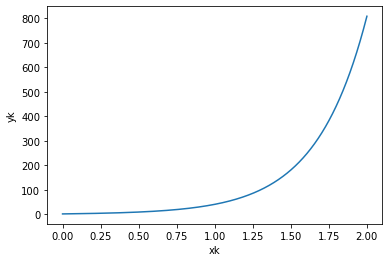

In [14]:
#4pt
z = SODA(0, 2)
xk = z[0]
yk = z[1]
plt.plot(xk,yk)
plt.xlabel('xk')
plt.ylabel('yk')

3- The exact solution of the second-order differential equation is $g(x)= 2e^{3x}-e^{-2x}+1$. Plot the absolute value, $\mid y_k - g_k\mid$ against x_k.

Text(0, 0.5, 'abs(yk - gk(xk)')

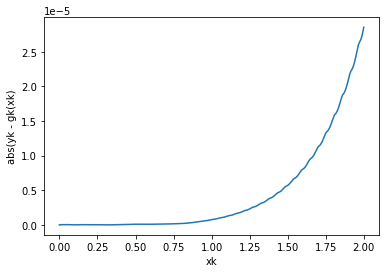

In [15]:
#3pt
gk = lambda x : 2 * np.exp(3*x) - np.exp(-2*x) + 1

plt.plot(xk, abs(yk - gk(xk)))
plt.xlabel('xk')
plt.ylabel("abs(yk - gk(xk)")

4- Write a Write a function called **L2_error** that takes $a,b,H$ and return the L2 error, $L2Er$ between the exact and the approximate solution given by

$$L2Er = \sum_{k = 0}^N H(y_k - g_k)^2$$

In [16]:
#3pt h:vecotrization
def L2_error(a, b, H):
    YK = SODA(a,b,H)[1]
    GK = gk(SODA(a,b,H)[0])
    N = int((b-a)/H)
    total = 0
    for i in range(0, N+1):
        total += (H*(YK[i] - GK[i])**2)
    return total

4- Let us denote $L2Er_j$ the output of **L2_error** for a given argument $a,b,H_j$. Compute the array of $L2Er_j$ for $a = 0, b=2$ and $H_j$ in an array $L =[ 10^{-1}, 10^{-2}, 10^{-3}, 10^{-4}]$.

In [17]:
#3pt
H = np.array([10**(-1),10**(-2),10**(-3),10**(-4)])
𝐿2𝐸𝑟𝑗 = np.array([L2_error(0, 2, 10**(-1)),L2_error(0, 2, 10**(-2)),L2_error(0, 2, 10**(-3)), L2_error(0, 2, 10**(-4))])
print("𝐿2𝐸𝑟𝑗 = ", 𝐿2𝐸𝑟𝑗)

𝐿2𝐸𝑟𝑗 =  [1.76688197e-10 1.34088211e-10 1.29754197e-10 1.31295082e-10]


5- Plot the array of $L2Er_j$ against the array of $H_j$.

Text(0, 0.5, 'L2Erj')

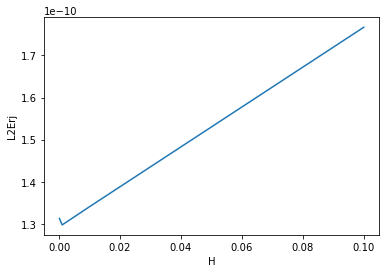

In [18]:
#3pt
plt.plot(H,𝐿2𝐸𝑟𝑗)
plt.xlabel('H')
plt.ylabel("L2Erj")

### Regression Plots

In [19]:
# lmplot combines regression plots with facet grid
tips_df = sns.load_dataset('tips')
tips_df.head()
plt.figure(figsize=(8,6));
sns.set_context('paper', font_scale=1.4);

plt.figure(figsize=(8,6));

# We can plot a regression plot studying whether total bill effects the tip
# hue is used to show separation based off of categorical data
# We see that males tend to tip slightly more
# Define different markers for men and women
# You can effect the scatter plot by passing in a dictionary for styling of markers
s# You can separate the data into separate columns for day data
# sns.lmplot(x='total_bill', y='tip', col='sex', row='time', data=tips_df)
tips_df.head()

# Makes the fonts more readable
sns.set_context('poster', font_scale=1.4)

sns.lmplot(x='total_bill', y='tip', data=tips_df, col='day', hue='sex',
          height=8, aspect=0.6);ns.lmplot(x='total_bill', y='tip', hue='sex', data=tips_df, markers=['o', '^'], 
          scatter_kws={'s': 100, 'linewidth': 0.5, 'edgecolor': 'w'});


NameError: name 'sns' is not defined

# changing line

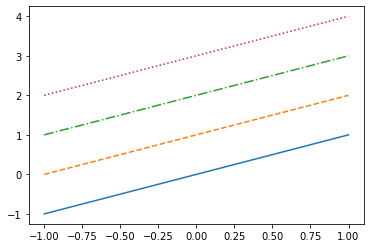

In [20]:
# changing the linestyles
plt.plot(x, x + 0, linestyle='solid')    
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');


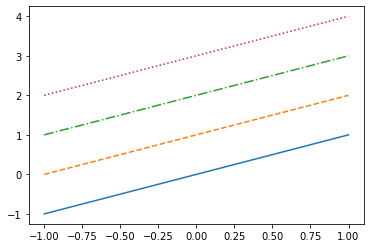

In [21]:
# For short, you can use the following codes:
plt.plot(x, x + 0, linestyle='-')  # solid
plt.plot(x, x + 1, linestyle='--') # dashed
plt.plot(x, x + 2, linestyle='-.') # dashdot
plt.plot(x, x + 3, linestyle=':');  # dotted

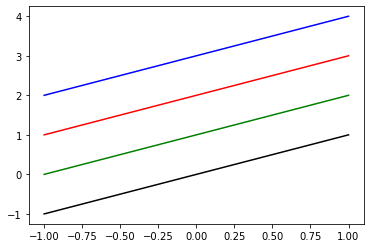

In [22]:
# changing colours of lines
plt.plot(x, x + 0, color='black')  
plt.plot(x, x + 1, color='green') 
plt.plot(x, x + 2, color='red') 
plt.plot(x, x + 3, color='blue')
plt.show()

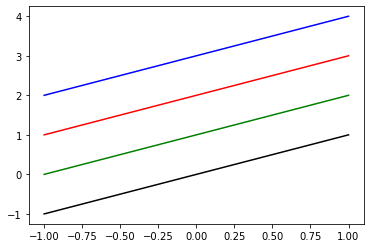

In [23]:
plt.plot(x, x + 0, color='k')  # black line
plt.plot(x, x + 1, color='g')  # green line
plt.plot(x, x + 2, color='r')  # red line 
plt.plot(x, x + 3, color='b'); # blue line

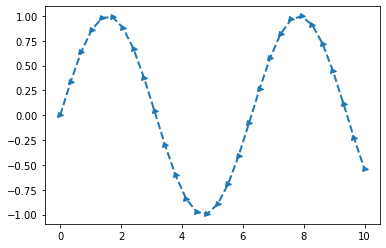

In [24]:
y = np.linspace(0, 10, 30)
plt.plot(y, np.sin(y), '>--', linewidth=2, markersize=5);

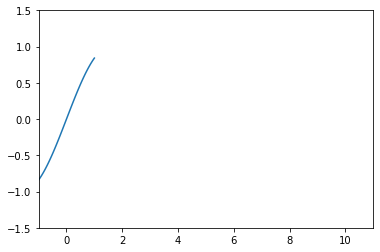

In [25]:
plt.plot(x, np.sin(x))
plt.xlim(-1, 11)         # changing the limits of the x-axis
plt.ylim(-1.5, 1.5);     # changing the limits of the y-axis

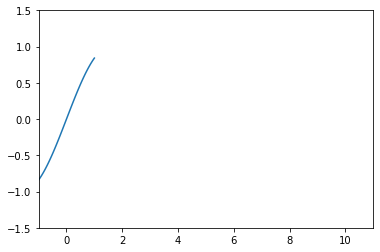

In [26]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);  # alternative approach to changing the limit of the axes

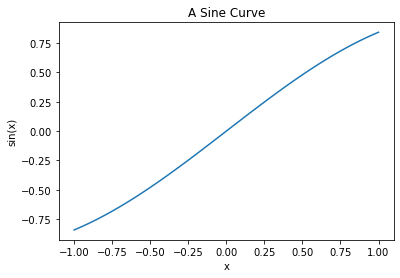

In [27]:
#Labeling plots

plt.plot(x, np.sin(x))
plt.title("A Sine Curve")  # adding title of the plot
plt.xlabel('x')            # adding label for the x-axis of the plot 
plt.ylabel('sin(x)');      # adding label for the y-axis of the plot 



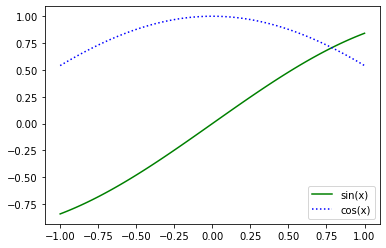

In [28]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')   # adding the label argument for plot 1
plt.plot(x, np.cos(x), ':b', label='cos(x)')   # adding the label argument for plot 2
plt.legend(); # calling for the legend

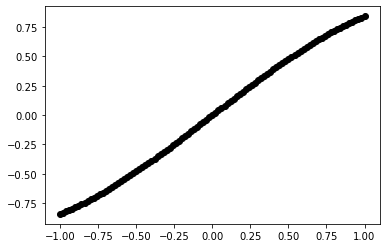

In [29]:
# showing a scatter plot with `plot` function
plt.plot(x, np.sin(x),'ok');

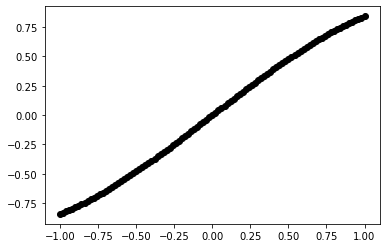

In [30]:
# plotting scatter plot
plt.scatter(x, np.sin(x), marker='o', color='k');

In [32]:
# tuning histogram plot
plt.hist(datas, bins=30, alpha=0.5, histtype='stepfilled', edgecolor=None);

NameError: name 'datas' is not defined

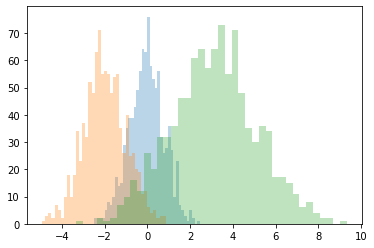

In [33]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

plt.hist(x1, histtype='stepfilled', alpha=0.3, bins=40)
plt.hist(x2, histtype='stepfilled', alpha=0.3, bins=40)
plt.hist(x3, histtype='stepfilled', alpha=0.3, bins=40);

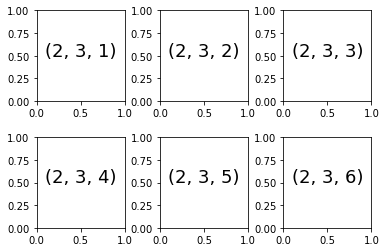

In [34]:
plt.figure().subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

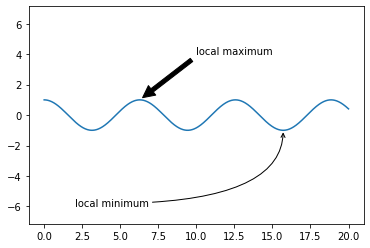

In [35]:
x = np.linspace(0, 20, 1000)
plt.plot(x, np.cos(x))
plt.axis('equal')
plt.annotate('local maximum', 
             xy=(6.28, 1), 
             xytext=(10, 4), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('local minimum', 
             xy=(5 * np.pi, -1), 
             xytext=(2, -6),
             arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"));